## Project 2 Starting Over
Jacob Minkin
Last project I tried to predict a critical violation from location and cuisine. The problem is that almost all restaurants have at least one critical violation which made it hard to get any predictive value from the model. Now I want to try again with predicting the score and therefore grade of the restaurant

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.impute import KNNImputer
sns.set_style('darkgrid')

#Import Data
df = pd.read_csv('../data/Inspection.csv')
df['date'] = pd.to_datetime(df['INSPECTION DATE'])
df = df[df.BORO == 'Manhattan']

## Find most recent score for every restaurant

In [483]:
df.sort_values(['date'], ascending=False, inplace= True)
df_recent = df.groupby(['CAMIS'], sort=False).first()

In [484]:
#df_recent.DBA.value_counts().head(25).to_csv('Restaurant_Chains.csv', index= True)

In [485]:

df_recent.describe().T

,count,mean,std,min,25%,50%,75%,max
ZIPCODE,10612.0,1.002418e+04,4.291442e+01,10001.000000,1.001000e+04,1.001700e+04,1.002800e+04,1.234500e+04
SCORE,9082.0,1.294924e+01,1.074349e+01,0.000000,7.000000e+00,1.100000e+01,1.300000e+01,1.190000e+02
Latitude,10796.0,3.995424e+01,5.655013e+00,0.000000,4.072874e+01,4.075065e+01,4.076561e+01,4.087289e+01
Longitude,10796.0,-7.252866e+01,1.026535e+01,-74.019624,-7.399454e+01,-7.398534e+01,-7.397071e+01,0.000000e+00
Community Board,10569.0,1.051116e+02,3.375243e+00,101.000000,1.030000e+02,1.050000e+02,1.070000e+02,1.640000e+02
Council District,10569.0,3.626455e+00,2.322732e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.000000e+01
Census Tract,10569.0,1.021398e+04,6.706743e+03,201.000000,5.000000e+03,9.300000e+03,1.340000e+04,3.170400e+04
BIN,10486.0,1.038530e+06,4.305797e+04,1000000.000000,1.011022e+06,1.029962e+06,1.062823e+06,1.799161e+06
BBL,10781.0,9.824445e+08,1.652645e+08,1.000000,1.004950e+09,1.008610e+09,1.012990e+09,1.270000e+09
Location Point,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [486]:
df.DBA.value_counts().head(35)

STARBUCKS                 739
DUNKIN                    675
SUBWAY                    548
CHIPOTLE MEXICAN GRILL    290
MCDONALD'S                248
JOE & THE JUICE           244
BLUESTONE LANE            198
LE PAIN QUOTIDIEN         191
SWEETGREEN                189
PRET A MANGER             173
JUST SALAD                148
MAMAN                     140
DOMINO'S                  128
CHOP'T                    114
787 COFFEE                107
GREGORYS COFFEE           102
INSOMNIA COOKIES          101
LITTLE ITALY PIZZA         97
PARIS BAGUETTE             97
THINK COFFEE               97
STARBUCKS COFFEE           95
SHAKE SHACK                89
POPEYES                    89
DUNKIN'                    85
VAN LEEUWEN ICE CREAM      84
BURGER KING                82
DIG INN                    80
TACO BELL                  78
LENWICH                    77
VIVI BUBBLE TEA            75
CHIRPING CHICKEN           74
BAREBURGER                 72
JUICE PRESS                70
GO GO CURR

<AxesSubplot:>

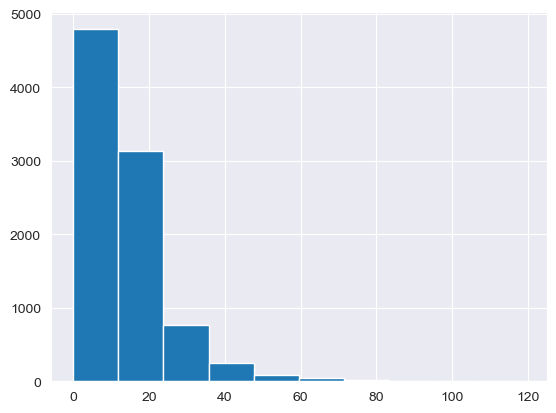

In [487]:
df_recent.SCORE.hist()


In [488]:
df_recent[df_recent.ACTION == 'No violations were recorded at the time of this inspection.']

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,VIOLATION CODE,...,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date
CAMIS,,,,,,,,,,,,,,,,,,,,,
41267566,SMITH & MILLS,Manhattan,71,NORTH MOORE STREET,10013.0,2122262515,American,2/9/2023,No violations were recorded at the time of thi...,None,...,1002123.0,1.001880e+09,MN24,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-09
50111280,PLANTSHED COFFEE BAR,Manhattan,723,AMSTERDAM AVENUE,10025.0,2126624400,Coffee/Tea,2/9/2023,No violations were recorded at the time of thi...,04H,...,1032587.0,1.012268e+09,MN12,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-09
40535738,NEIL SIMON THEATRE,Manhattan,250,WEST 52 STREET,10019.0,2123544624,American,2/8/2023,No violations were recorded at the time of thi...,None,...,1024820.0,1.010230e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-08
41531136,AUGUST WILSON THEATRE,Manhattan,245,WEST 52 STREET,10019.0,2125825472,American,2/1/2023,No violations were recorded at the time of thi...,None,...,1024826.0,1.010240e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-01
50125715,TACO BELL,Manhattan,18,EAST 14 STREET,10003.0,6095866680,Mexican,1/23/2023,No violations were recorded at the time of thi...,28-03,...,1009392.0,1.005710e+09,MN23,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50044589,BAR AT THE GARDEN,Manhattan,4,PENN PLZ,10121.0,2124656273,American,5/30/2019,No violations were recorded at the time of thi...,06D,...,1082908.0,1.007810e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-30
50044522,CLUB GRILL,Manhattan,4,PENN PLZ,10121.0,2124656273,American,5/30/2019,No violations were recorded at the time of thi...,02B,...,1082908.0,1.007810e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-30
50045112,GARDEN PUB,Manhattan,4,PENN PLZ,10121.0,2124656302,American,5/30/2019,No violations were recorded at the time of thi...,10F,...,1082908.0,1.007810e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-30


In [489]:
df[['CAMIS','GRADE','SCORE', 'date']].loc[df.DBA == 'LA PIZZA & CONVENIENCE']

,CAMIS,GRADE,SCORE,date


In [490]:
df_recent[['GRADE','SCORE', 'date']].loc[df_recent.DBA == 'LA PIZZA & CONVENIENCE']

,GRADE,SCORE,date
CAMIS,,,


In [491]:
df_recent.DBA[df_recent.GRADE.isna()]

CAMIS
50117520                       MALA HOUSE
50107638    TERRIFIC WINGS TACOS & THINGS
50119364                             None
50128995                    PEAKY BARISTA
50131336               LITTLE ITALY PIZZA
                        ...              
50130678                     CASA TOSCANA
50124010                             None
50129856                       FIVE ACRES
50129286           SOPHIE'S CUBAN CUISINE
50107551                           Zazzys
Name: DBA, Length: 1741, dtype: object

In [492]:
df_unranked = df[df['INSPECTION DATE'] == '1/1/1900']

In [493]:
df_recent = df_recent[df_recent['INSPECTION DATE'] != '1/1/1900']

<AxesSubplot:>

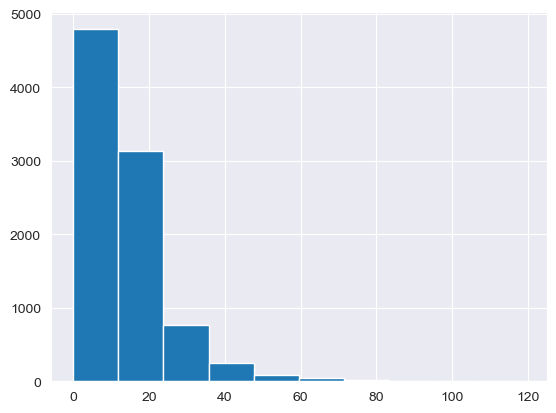

In [494]:
df_recent.SCORE.hist()

## Average Score for Boro

In [495]:
df_recent.groupby('BORO')['SCORE'].mean()

BORO
Manhattan    12.94924
Name: SCORE, dtype: float64

In [496]:
df_recent.BORO.sort_values()

CAMIS
50114345    Manhattan
41543826    Manhattan
41460700    Manhattan
40668464    Manhattan
50073606    Manhattan
              ...    
50120540    Manhattan
50107980    Manhattan
50075419    Manhattan
41642422    Manhattan
50043445    Manhattan
Name: BORO, Length: 9083, dtype: object

In [497]:
df[df.BORO == '0']

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,...,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date


## Finding a resteraunt as a proxy for exploratory analysis

In [498]:
STARBUCKS = df_recent['DBA'].str.contains('STARBUCKS', regex=False, na=False)
STARBUCKS = df_recent[STARBUCKS]
Sbucks = df_recent[df_recent.DBA == "Starbucks"]
STARBUCKS = pd.concat([STARBUCKS, Sbucks])
STARBUCKS.CUISINE.value_counts()

Coffee/Tea    190
Name: CUISINE, dtype: int64

In [546]:
STARBUCKS.SCORE.describe().to_csv('Sbucks.csv', index=True)

In [547]:
Dunkin = df_recent['DBA'].str.contains('DUNKIN', regex=False, na=False)
Dunkin = df_recent[Dunkin]
#Dbucks = df[df.DBA == "Dunkin"]
#STARBUCKS = pd.concat([STARBUCKS, Sbucks])
Dunkin.SCORE.describe()


count    159.000000
mean       9.320755
std        5.331208
min        0.000000
25%        5.000000
50%       10.000000
75%       12.000000
max       33.000000
Name: SCORE, dtype: float64

In [501]:
SUBWAY = df_recent['DBA'].str.contains("SUBWAY", regex=False, na=False)
SUBWAY = df_recent[SUBWAY]
#Dbucks = df[df.DBA == "Dunkin"]
#STARBUCKS = pd.concat([STARBUCKS, Sbucks])
SUBWAY.SCORE.mean()

SUBWAY['Dif_Score'] = abs( SUBWAY.SCORE - SUBWAY.SCORE.mean())

C:\Users\logic_switch\AppData\Local\Temp\ipykernel_33176\1708942729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SUBWAY['Dif_Score'] = abs( SUBWAY.SCORE - SUBWAY.SCORE.mean())


In [502]:
SUBWAY['Dif_Score']

CAMIS
50038538    7.096774
41501681    2.096774
41559193    7.096774
50012125    1.903226
50045121    8.096774
              ...   
41374594    0.096774
50002228    0.096774
41272215    0.903226
50007472    0.903226
50040782    9.903226
Name: Dif_Score, Length: 62, dtype: float64

## Breakdown of score by cuisine

In [503]:
df_recent.groupby('CUISINE')['SCORE'].mean().sort_values(ascending=False).head(15)


CUISINE
New French           40.000000
Californian          23.500000
English              20.888889
Pancakes/Waffles     19.600000
Chinese/Japanese     19.250000
Southeast Asian      18.343750
Moroccan             18.250000
Basque               18.000000
Fruits/Vegetables    17.666667
African              17.650000
Indian               17.236220
Latin American       17.155280
Russian              17.000000
Vegan                16.945946
Peruvian             16.866667
Name: SCORE, dtype: float64

## Its Starbucks Time!!

In [504]:
STARBUCKS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 50108947 to 50123623
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DBA                     190 non-null    object        
 1   BORO                    190 non-null    object        
 2   BUILDING                190 non-null    object        
 3   STREET                  190 non-null    object        
 4   ZIPCODE                 187 non-null    float64       
 5   PHONE                   190 non-null    object        
 6   CUISINE                 190 non-null    object        
 7   INSPECTION DATE         190 non-null    object        
 8   ACTION                  190 non-null    object        
 9   VIOLATION CODE          190 non-null    object        
 10  VIOLATION               190 non-null    object        
 11  CRITICAL FLAG           190 non-null    object        
 12  SCORE                   190 non-null  

<AxesSubplot:title={'center':'Distribution of Scores'}, ylabel='Frequency'>

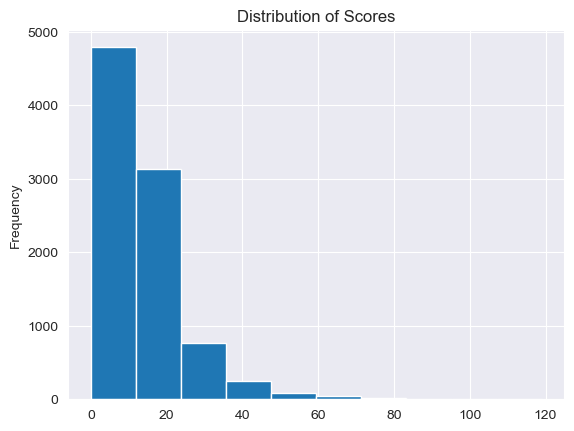

In [505]:
df_recent.SCORE.plot(kind='hist', title='Distribution of Scores', xlabel='Health Inspection Score')

In [506]:
#df_recent.SCORE.describe().to_csv('Score_breakdown.csv', index=True)

In [507]:
df_recent.groupby('CUISINE')['SCORE'].mean().sort_values(ascending=False).head(15)

CUISINE
New French           40.000000
Californian          23.500000
English              20.888889
Pancakes/Waffles     19.600000
Chinese/Japanese     19.250000
Southeast Asian      18.343750
Moroccan             18.250000
Basque               18.000000
Fruits/Vegetables    17.666667
African              17.650000
Indian               17.236220
Latin American       17.155280
Russian              17.000000
Vegan                16.945946
Peruvian             16.866667
Name: SCORE, dtype: float64

In [508]:
print(df_recent[df_recent.CUISINE == 'Chinese/Japanese'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Chinese/Japanese'].SCORE.std())

19.25
17.043082663258623


In [509]:
print(df_recent[df_recent.CUISINE == 'Chinese'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Chinese'].SCORE.std())

16.369515011547342
13.234956309495013


In [510]:
print(df_recent[df_recent.CUISINE == 'Japanese'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Japanese'].SCORE.std())

14.168181818181818
11.347237784708726


In [511]:
print(df_recent[df_recent.CUISINE == 'Italian'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Italian'].SCORE.std())

13.273076923076923
10.661477218815802


In [512]:
print(df_recent[df_recent.CUISINE == 'Pancakes/Waffles'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Pancakes/Waffles'].SCORE.std())


19.6
16.80178561939177


In [513]:
print(df_recent[df_recent.CUISINE == 'Mexican'].value_counts())
print(df_recent[df_recent.CUISINE == 'Mexican'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Mexican'].SCORE.std())

Series([], dtype: int64)
14.708502024291498
12.491787895258138


In [514]:
df_recent[df_recent.CUISINE== 'Pancakes/Waffles'].DBA.value_counts()

IHOP               2
WAFELS & DINGES    2
UPTOWN CREPES      1
Name: DBA, dtype: int64

In [515]:
print(df_recent[df_recent.CUISINE == 'Coffee/Tea'].count())
print(df_recent[df_recent.CUISINE == 'Coffee/Tea'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Coffee/Tea'].SCORE.std())

DBA                       863
BORO                      863
BUILDING                  862
STREET                    863
ZIPCODE                   855
PHONE                     863
CUISINE                   863
INSPECTION DATE           863
ACTION                    863
VIOLATION CODE            863
VIOLATION                 863
CRITICAL FLAG             863
SCORE                     863
GRADE                     863
GRADE DATE                823
RECORD DATE               863
INSPECTION TYPE           863
Latitude                  861
Longitude                 861
Community Board           849
Council District          849
Census Tract              849
BIN                       838
BBL                       857
NTA                       849
Location Point              0
Zip Codes                   0
Community Districts         0
Borough Boundaries          0
City Council Districts      0
Police Precincts            0
date                      863
dtype: int64
10.293163383545771
8.921859

In [516]:
print(df_recent[df_recent.CUISINE == 'Pizza'].DBA.count())
print(df_recent[df_recent.CUISINE == 'Pizza'].SCORE.mean())
print(df_recent[df_recent.CUISINE == 'Pizza'].SCORE.std())

415
14.250602409638555
10.993183807065924


In [517]:
LIpizza = df_recent['DBA'].str.contains("LITTLE ITALY PIZZA", regex=False, na=False)
LIpizza = df_recent[LIpizza]

print(LIpizza.SCORE.mean())
print(LIpizza.SCORE.std())


11.785714285714286
8.684013352827593


In [518]:
MCDONALD = df_recent['DBA'].str.contains("MCDONALD'S", regex=False, na=False)
MCDONALD = df_recent[MCDONALD]

print(MCDONALD.SCORE.mean())
print(MCDONALD.SCORE.std())
MCDONALD.sort_values('SCORE', ascending= False)

8.71111111111111
4.170361997707057


,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,VIOLATION CODE,...,BIN,BBL,NTA,Location Point,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date
CAMIS,,,,,,,,,,,,,,,,,,,,,
50045348,MCDONALD'S,Manhattan,1499,3 AVENUE,10028.0,2126288100,Hamburgers,1/12/2023,Violations were cited in the following area(s).,06D,...,1048759.0,1.015300e+09,MN32,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-12
41241639,MCDONALD'S,Manhattan,3549,BROADWAY,10031.0,2124916860,Hamburgers,8/1/2022,Violations were cited in the following area(s).,10F,...,1062380.0,1.020920e+09,MN04,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-01
50118148,MCDONALD'S,Manhattan,556,7 AVENUE,10018.0,6318581111,Hamburgers,7/5/2022,Violations were cited in the following area(s).,04N,...,1014503.0,1.007890e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-05
50040867,MCDONALD'S,Manhattan,946,8 AVENUE,10019.0,2125866676,Hamburgers,2/6/2023,Violations were cited in the following area(s).,10F,...,1024886.0,1.010270e+09,MN17,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-06
50070066,MCDONALD'S,Manhattan,966,3 AVENUE,10022.0,2127535360,Hamburgers,3/24/2022,Violations were cited in the following area(s).,10F,...,1036913.0,1.013120e+09,MN19,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-24
50010393,MCDONALD'S,Manhattan,608,WEST 207 STREET,10034.0,2123043611,Hamburgers,5/5/2022,Violations were cited in the following area(s).,08A,...,1082051.0,1.022350e+09,MN01,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-05
40548768,MCDONALD'S,Manhattan,4259,BROADWAY,10033.0,9175210827,Hamburgers,7/15/2022,Violations were cited in the following area(s).,06D,...,1064280.0,1.021760e+09,MN36,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-15
50001148,MCDONALD'S,Manhattan,148,WEST 125 STREET,10027.0,6469983697,Hamburgers,3/14/2022,Violations were cited in the following area(s).,10B,...,1057835.0,1.019090e+09,MN11,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-14
50045349,MCDONALD'S,Manhattan,18,EAST 42 STREET,10017.0,2125992127,Hamburgers,3/21/2022,Violations were cited in the following area(s).,02G,...,1035341.0,1.012760e+09,MN20,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-21


11.096774193548388
7.396742032967889


<AxesSubplot:>

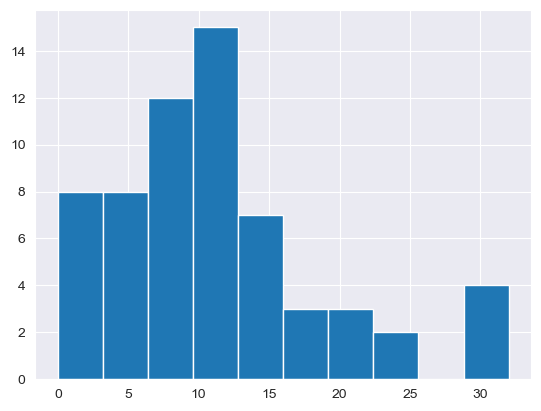

In [519]:
SUBWAY = df_recent['DBA'].str.contains('SUBWAY', regex=False, na=False)
SUBWAY = df_recent[SUBWAY]

print(SUBWAY.SCORE.mean())
print(SUBWAY.SCORE.std())
SUBWAY.SCORE.hist()

7.1421052631578945
4.190669377334712


<AxesSubplot:>

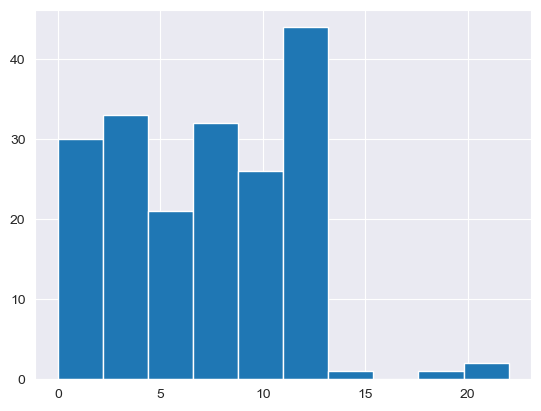

In [520]:
STARBUCKS = df_recent['DBA'].str.contains('STARBUCKS', regex=False, na=False)
STARBUCKS = df_recent[STARBUCKS]
Sbucks = df_recent[df_recent.DBA == "Starbucks"]
STARBUCKS = pd.concat([STARBUCKS, Sbucks])
STARBUCKS.CUISINE.value_counts()

print(STARBUCKS.SCORE.mean())
print(STARBUCKS.SCORE.std())
STARBUCKS.SCORE.hist()

In [521]:

DUNKIN = df_recent['DBA'].str.contains('DUNKIN', regex=False, na=False)
DUNKIN = df_recent[DUNKIN]

print(DUNKIN.SCORE.mean())
print(DUNKIN.SCORE.std())

9.320754716981131
5.33120827817469


In [522]:
CHIPOTLE = df_recent['DBA'].str.contains('CHIPOTLE', regex=False, na=False)
CHIPOTLE = df_recent[CHIPOTLE]

print(CHIPOTLE.SCORE.mean())
print(CHIPOTLE.SCORE.std())

8.055555555555555
5.845225972250062


In [523]:
TBell = df_recent['DBA'].str.contains('TACO BELL', regex=False, na=False)
TBell = df_recent[TBell]

print(TBell.SCORE.mean())
print(TBell.SCORE.std())

10.12
7.344612537999084


In [524]:
TBell = df_recent['DBA'].str.contains('AMC THEATRES', regex=False, na=False)
TBell = df_recent[TBell]

print(TBell.SCORE.mean())
print(TBell.SCORE.std())

9.272727272727273
3.926599268856171


In [525]:
df.CUISINE

30180      Pakistani
16817        Spanish
119890       Spanish
54337     Coffee/Tea
84389          Pizza
             ...    
78540            NaN
153283           NaN
78548            NaN
26082            NaN
0                NaN
Name: CUISINE, Length: 78553, dtype: object

In [526]:
df_recent.SCORE.mean
df_recent.SCORE.std()

10.743485769694114

In [527]:
df_recent.CUISINE.value_counts()

American        2336
Coffee/Tea       863
Italian          520
Japanese         440
Chinese          433
                ... 
Bangladeshi        2
Creole/Cajun       2
Basque             1
Iranian            1
New French         1
Name: CUISINE, Length: 83, dtype: int64

## Regression for Starbucks from Longitude and Latitude

In [528]:
STARBUCKS = df_recent['DBA'].str.contains('STARBUCKS', regex=False, na=False)
STARBUCKS = df_recent[STARBUCKS]
Sbucks = df_recent[df_recent.DBA == "Starbucks"]
STARBUCKS = pd.concat([STARBUCKS, Sbucks])
STARBUCKS = STARBUCKS.loc[(STARBUCKS.SCORE.notnull()) & (STARBUCKS.Longitude != 0) & (STARBUCKS.Latitude != 0)]
STARBUCKS.CUISINE.value_counts()
STARBUCKS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 50108947 to 50123623
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DBA                     187 non-null    object        
 1   BORO                    187 non-null    object        
 2   BUILDING                187 non-null    object        
 3   STREET                  187 non-null    object        
 4   ZIPCODE                 187 non-null    float64       
 5   PHONE                   187 non-null    object        
 6   CUISINE                 187 non-null    object        
 7   INSPECTION DATE         187 non-null    object        
 8   ACTION                  187 non-null    object        
 9   VIOLATION CODE          187 non-null    object        
 10  VIOLATION               187 non-null    object        
 11  CRITICAL FLAG           187 non-null    object        
 12  SCORE                   187 non-null  

In [529]:
STARBUCKS.loc[STARBUCKS['Community Board'].isnull(), 'Community Board'] = 105


In [530]:
STARBUCKS['long_lat'] = STARBUCKS.Longitude * STARBUCKS.Latitude

long_lat = ['Longitude','Latitude', 'long_lat', 'ZIPCODE', 'Community Board']
X_STARBUCKS =np.array( STARBUCKS[long_lat])
y_STARBUCKS =np.array( STARBUCKS.SCORE)

In [531]:
MCDONALD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 41578619 to 41275238
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DBA                     45 non-null     object        
 1   BORO                    45 non-null     object        
 2   BUILDING                45 non-null     object        
 3   STREET                  45 non-null     object        
 4   ZIPCODE                 44 non-null     float64       
 5   PHONE                   45 non-null     object        
 6   CUISINE                 45 non-null     object        
 7   INSPECTION DATE         45 non-null     object        
 8   ACTION                  45 non-null     object        
 9   VIOLATION CODE          45 non-null     object        
 10  VIOLATION               45 non-null     object        
 11  CRITICAL FLAG           45 non-null     object        
 12  SCORE                   45 non-null    

In [532]:
MCDONALD['long_lat'] = MCDONALD.Longitude * MCDONALD.Latitude

long_lat = ['Longitude','Latitude', 'long_lat']
X_MCDONALD =np.array( MCDONALD[long_lat])
y_MCDONALD =np.array( MCDONALD.SCORE)

C:\Users\logic_switch\AppData\Local\Temp\ipykernel_33176\1403315745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MCDONALD['long_lat'] = MCDONALD.Longitude * MCDONALD.Latitude


In [533]:
SUBWAY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 50038538 to 50040782
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DBA                     62 non-null     object        
 1   BORO                    62 non-null     object        
 2   BUILDING                62 non-null     object        
 3   STREET                  62 non-null     object        
 4   ZIPCODE                 61 non-null     float64       
 5   PHONE                   62 non-null     object        
 6   CUISINE                 62 non-null     object        
 7   INSPECTION DATE         62 non-null     object        
 8   ACTION                  62 non-null     object        
 9   VIOLATION CODE          62 non-null     object        
 10  VIOLATION               62 non-null     object        
 11  CRITICAL FLAG           62 non-null     object        
 12  SCORE                   62 non-null    

In [534]:
SUBWAY = SUBWAY.loc[(SUBWAY.SCORE.notnull())]
SUBWAY['long_lat'] = SUBWAY.Longitude * SUBWAY.Latitude

long_lat = ['Longitude','Latitude', 'long_lat']
X_SUBWAY =np.array( SUBWAY[long_lat])
y_SUBWAY =np.array( SUBWAY.SCORE)

In [535]:
from sklearn.linear_model import LinearRegression

linmod = LinearRegression()

linmod.fit(y =y_STARBUCKS, X=X_STARBUCKS)

# Calculate Accuracy
accuracy = linmod.score(X= X_STARBUCKS, y = y_STARBUCKS)
print(f"Model accuracy: {accuracy}")

# Look at betas (coefficients)
betas = linmod.coef_
print(f"Betas: {betas}")

Model accuracy: 0.013347053669328424
Betas: [-1.36779837e+04  2.47600228e+04  3.34830178e+02  8.49278140e-03
  3.63006307e-01]


In [541]:
df_recent.DBA.value_counts()

Name_list = df_recent.DBA.unique()
Name_dicts = {}
Restaurant_Chain = df_recent.DBA.value_counts()
#score_dicts = {}
for name in Name_list:
    Name_dicts[name] = Restaurant_Chain[name]


df_recent['num_restaurants'] = df_recent['DBA'].map(Name_dicts)
df_recent['is_chain'] = df_recent['num_restaurants'].apply(lambda x: 1 if x > 5 else 0)


In [542]:

df_recent['is_chain'].value_counts()

0    8028
1    1055
Name: is_chain, dtype: int64

In [374]:
Predictor_list = ['SCORE', 'CUISINE', 'is_chain']
df_test = df_recent[Predictor_list]
df_test = df_test[(df_test.SCORE.notnull()) & (df_test.CUISINE.notnull())]

Just_CUISINE = pd.get_dummies(df_test.CUISINE)
#Just_CUISINE['intercept'] = 1
Is_chain = pd.merge(df_recent['is_chain'], Just_CUISINE, on='CAMIS')

Simple_y = df_test.SCORE
#Simple_X

In [375]:
from sklearn.linear_model import LinearRegression

CUISINE_linear_model = LinearRegression().fit(X = Just_CUISINE, y= Simple_y)

CUISINE_score = CUISINE_linear_model.score(Just_CUISINE, Simple_y)
print(f'CUISINE score: {CUISINE_score}')

IS_CHAIN_linear_model = LinearRegression().fit(X = Is_chain, y= Simple_y)

IS_CHAIN_score = IS_CHAIN_linear_model.score(Is_chain, Simple_y)
print(f'CHAIN score: {IS_CHAIN_score}')


CUISINE score: 0.03624567907483578
CHAIN score: 0.041331037676511695


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CHAIN score: 0.025672755360705013
CHAIN score: 0.03190180893736638
CHAIN score: 0.03333332887380003
CHAIN score: 0.03350548047971891
CHAIN score: 0.032642976219307784
CHAIN score: 0.03242556295036836
CHAIN score: 0.032589007982630425
CHAIN score: 0.032136632564807255
CHAIN score: 0.031025733329895444
CHAIN score: 0.031205426902541467
CHAIN score: 0.03051624108839346
CHAIN score: 0.030487869721515293
CHAIN score: 0.030463436611545713
CHAIN score: 0.030122413552109872
CHAIN score: 0.030122413552109872
CHAIN score: 0.029824296192232813
CHAIN score: 0.030109758079476134
CHAIN score: 0.029530794334926558
CHAIN score: 0.029530794334926558
CHAIN score: 0.029530794334926558


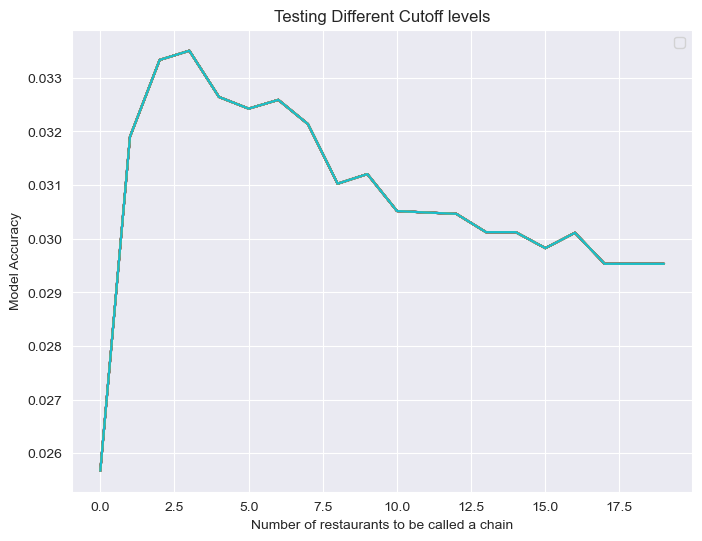

0.03350548047971891


In [548]:
is_chain_size = np.zeros((20, 20))
for i in range(0, 20):
    df_recent['1_chain'] = df_recent['num_restaurants'].apply(lambda x: 1 if x > i else 0)
    Is_chain = pd.merge(df_recent['1_chain'], Just_CUISINE, on='CAMIS')
    IS_CHAIN_linear_model = LinearRegression().fit(X = Is_chain, y= Simple_y)

    IS_CHAIN_score = IS_CHAIN_linear_model.score(Is_chain, Simple_y)
    is_chain_size[i] = IS_CHAIN_score
    print(f'CHAIN score: {IS_CHAIN_score}')
plt.figure(figsize=(8, 6))
plt.plot(is_chain_size)
# Add labels and title
plt.xlabel('Number of restaurants to be called a chain')
plt.ylabel('Model Accuracy')
plt.title('Testing Different Cutoff levels')
plt.legend()

# Show the plot
plt.show()
print(is_chain_size.max())

In [377]:
is_chain_size = np.zeros((100))
for i in range(0, 100):
    df_recent['chain'] = df_recent['num_restaurants'].apply(lambda x: 1 if x > 2 else 0)
    df_recent['2_chain'] = df_recent['num_restaurants'].apply(lambda x: 1 if x > i else 0)
    chaining = ['1_chain', '2_chain']
    Is_chain = pd.merge(df_recent[chaining], Just_CUISINE, on='CAMIS')
    IS_CHAIN_linear_model = LinearRegression().fit(X = Is_chain, y= Simple_y)

    IS_CHAIN_score = IS_CHAIN_linear_model.score(Is_chain, Simple_y)
    is_chain_size[i] = IS_CHAIN_score
    #print(f'CHAIN score: {IS_CHAIN_score}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


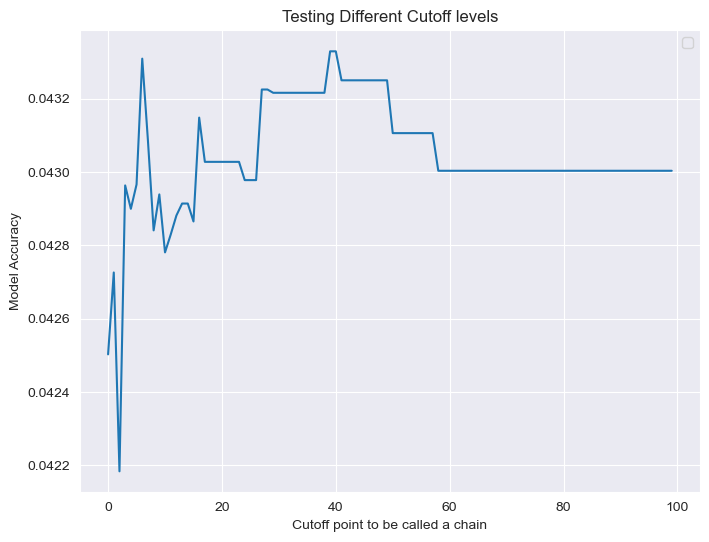

0.04332937681439253
39


In [378]:
plt.figure(figsize=(8, 6))

plt.plot(is_chain_size)
# Add labels and title
plt.xlabel('Cutoff point to be called a chain')
plt.ylabel('Model Accuracy')
plt.title('Testing Different Cutoff levels')
plt.legend()

# Show the plot
plt.show()
print(is_chain_size.max())
print(is_chain_size.argmax())


In [379]:
cuisine_counts = pd.DataFrame(df_recent.CUISINE.value_counts().sort_values())
cuisine_counts.reset_index(inplace=True)
cuisine_counts = cuisine_counts.rename(columns={'CUISINE': 'count'})
cuisine_counts = cuisine_counts.sort_values('index')
#cuisine_counts.reset_index(inplace=True)
#print(cuisine_counts)

cuisine_scores = pd.DataFrame(df_recent.groupby('CUISINE')['SCORE'].mean())
cuisine_scores.reset_index(inplace=True)
cuisine_scores = cuisine_scores.rename(columns={'CUISINE': 'index'})
#print(cuisine_scores)
CUISINE_data = pd.merge(cuisine_counts,cuisine_scores, on= 'index')
print(CUISINE_data)
CUISINE_data.to_csv('cuisine info.csv', index=False)


                 index  count      SCORE
0               Afghan      4  16.750000
1              African     20  17.650000
2             American   2336  12.021842
3             Armenian      2   5.500000
4   Asian/Asian Fusion    177  13.898305
..                 ...    ...        ...
78             Tex-Mex    130  10.107692
79                Thai    135  16.274074
80             Turkish     20  10.850000
81               Vegan     37  16.945946
82          Vegetarian     41  11.439024

[83 rows x 3 columns]


In [380]:
df_recent[df_recent.CUISINE == 'Fusion']

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,VIOLATION CODE,...,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date,num_restaurants,is_chain,1_chain,2_chain
CAMIS,,,,,,,,,,,,,,,,,,,,,
50106138,GANSEVOORT LIBERTY MARKET,Manhattan,150,GREENWICH STREET,10007.0,9175664959,Fusion,12/14/2022,Violations were cited in the following area(s).,06E,...,NaN,NaN,NaN,NaN,NaN,2022-12-14,1,0,0,0
50088516,FEROCE & THE FLEUR ROOM,Manhattan,105,WEST 28 STREET,10001.0,5164763178,Fusion,12/14/2022,Violations were cited in the following area(s).,04N,...,NaN,NaN,NaN,NaN,NaN,2022-12-14,1,0,0,0
50104524,NEW YORK VINTNERS,Manhattan,100,CHURCH STREET,10007.0,3473272025,Fusion,12/7/2022,Violations were cited in the following area(s).,10F,...,NaN,NaN,NaN,NaN,NaN,2022-12-07,1,0,0,0
50082474,ETC,Manhattan,341,5 AVENUE,10016.0,6464100288,Fusion,11/23/2022,Violations were cited in the following area(s).,10F,...,NaN,NaN,NaN,NaN,NaN,2022-11-23,1,0,0,0
50096582,"WOK TO WALK, LOS TACOS HERMANOS, POKE BOWL, & ...",Manhattan,570,8 AVENUE,10018.0,9178875004,Fusion,9/14/2022,Violations were cited in the following area(s).,10B,...,NaN,NaN,NaN,NaN,NaN,2022-09-14,1,0,0,0
50126140,C AS IN CHARLIE,Manhattan,5,BLEECKER STREET,10012.0,9294052205,Fusion,8/24/2022,Violations were cited in the following area(s).,06C,...,NaN,NaN,NaN,NaN,NaN,2022-08-24,1,0,0,0
50122073,ARAMARK SERVICES,Manhattan,1211,AVE AMERICAS,NaN,9293868055,Fusion,8/9/2022,Violations were cited in the following area(s).,10B,...,NaN,NaN,NaN,NaN,NaN,2022-08-09,1,0,0,0
50122076,ARAMARK SERVICES INC,Manhattan,1211,AVE AMERICAS,NaN,9293868055,Fusion,8/9/2022,No violations were recorded at the time of thi...,None,...,NaN,NaN,NaN,NaN,NaN,2022-08-09,1,0,0,0


In [381]:
cuisine_categories = pd.read_csv('../data/cuisine_categories.csv')
#'cuisine_categories'
cuisine_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CUISINE   83 non-null     object 
 1   count     83 non-null     int64  
 2   SCORE     83 non-null     float64
 3   Subgroup  83 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ KB


In [382]:
cuisine_categories.CUISINE

0        American
1      Coffee/Tea
2         Italian
3        Japanese
4         Chinese
         ...     
78     Indonesian
79    Californian
80        Iranian
81         Basque
82     New French
Name: CUISINE, Length: 83, dtype: object

In [383]:
cuisine_categories.groupby('Subgroup').mean()

,count,SCORE
Subgroup,,
American,1175.000000,11.939492
Bakery,147.000000,12.601496
Bevereges,39.500000,9.638559
Coffee/Tea/Donuts,343.666667,8.445730
East Asian,138.300000,15.633307
Eastern European,7.500000,13.875000
European,33.750000,11.507190
Ice Cream,106.000000,11.113208
Island,25.666667,12.946716


,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE,INSPECTION DATE,ACTION,VIOLATION CODE,...,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date,num_restaurants,is_chain,1_chain,2_chain
CAMIS,,,,,,,,,,,,,,,,,,,,,
50114345,PHALIA,Manhattan,126,LEXINGTON AVENUE,10016.0,6463705380,Pakistani,2/11/2023,Establishment re-opened by DOHMH.,10F,...,NaN,NaN,NaN,NaN,NaN,2023-02-11,1,0,0,0
50067994,DOMINICAN VALLE RESTAURANT,Manhattan,1601,SAINT NICHOLAS AVENUE,10040.0,6468690092,Spanish,2/10/2023,Violations were cited in the following area(s).,02G,...,NaN,NaN,NaN,NaN,NaN,2023-02-10,1,0,0,0
50036864,PRESTO FRESH CAFE,Manhattan,559,LENOX AVENUE,10037.0,3476849436,Spanish,2/10/2023,Violations were cited in the following area(s).,08A,...,NaN,NaN,NaN,NaN,NaN,2023-02-10,1,0,0,0
50057298,HANDCRAFT COFFEE,Manhattan,151,EAST 77 STREET,10075.0,6469227025,Coffee/Tea,2/10/2023,Violations were cited in the following area(s).,06E,...,NaN,NaN,NaN,NaN,NaN,2023-02-10,1,0,0,0
50085148,BEST PIZZA II,Manhattan,1140,1 AVENUE,10065.0,2128385080,Pizza,2/10/2023,Violations were cited in the following area(s).,10B,...,NaN,NaN,NaN,NaN,NaN,2023-02-10,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226031,ARS NOVA THEATER,Manhattan,511,WEST 54 STREET,10019.0,2124899800,American,10/17/2018,Violations were cited in the following area(s).,05D,...,NaN,NaN,NaN,NaN,NaN,2018-10-17,1,0,0,0
40560953,GOLDEN THEATRE,Manhattan,252,WEST 45 STREET,10036.0,2125752914,American,10/17/2018,Violations were cited in the following area(s).,04A,...,NaN,NaN,NaN,NaN,NaN,2018-10-17,1,0,0,0
40944945,Stage 42,Manhattan,422,WEST 42 STREET,10036.0,2125867610,American,9/19/2018,Violations were cited in the following area(s).,04N,...,NaN,NaN,NaN,NaN,NaN,2018-09-19,1,0,0,0


In [404]:
df_recent['CAMIS'] = df_recent.index

In [407]:
TempList = ['CUISINE', 'Subgroup']

CUISINE_MERGE = pd.merge(df_recent, cuisine_categories[TempList], on= 'CUISINE',how='left').set_index('CAMIS')

In [565]:
CUISINE_MERGE.Subgroup.value_counts()

American             2350
East Asian           1383
Mediterranean        1063
Coffee/Tea/Donuts    1031
Other                 514
Pizza                 415
Mexican               377
Meat                  376
Bakery                294
Sandwhich             232
Salad                 173
Latin American        161
South Asian           135
European              135
Ice Cream             106
Seafood               102
Bevereges              79
Island                 77
Middle Eastern         65
Eastern European       15
Name: Subgroup, dtype: int64

In [567]:
CUISINE_MERGE.Subgroup.count()
print(CUISINE_MERGE.groupby('Subgroup').SCORE.mean())
print(CUISINE_MERGE.groupby('Subgroup').SCORE.std())
print(CUISINE_MERGE.groupby('Subgroup').count())

Subgroup
American             12.020860
Bakery               12.809524
Bevereges             9.632911
Coffee/Tea/Donuts    10.208535
East Asian           15.183659
Eastern European     15.333333
European             12.977778
Ice Cream            11.113208
Island               13.480519
Latin American       17.155280
Meat                 11.960106
Mediterranean        13.712135
Mexican              13.122016
Middle Eastern       11.153846
Other                13.928016
Pizza                14.250602
Salad                 9.936416
Sandwhich            13.181034
Seafood              14.480392
South Asian          16.925926
Name: SCORE, dtype: float64
Subgroup
American              9.565207
Bakery                9.072957
Bevereges             7.590779
Coffee/Tea/Donuts     8.667659
East Asian           12.008118
Eastern European     11.101265
European             10.034617
Ice Cream             8.247736
Island               10.644507
Latin American       15.236699
Meat                  8.

In [391]:
Predictor_list = ['SCORE', 'Subgroup', 'is_chain']
df_test = CUISINE_MERGE[Predictor_list]
df_test = df_test[(df_test.SCORE.notnull()) & (df_test.Subgroup.notnull())]
Just_CUISINE = pd.get_dummies(df_test.Subgroup)
Just_CUISINE

,American,Bakery,Bevereges,Coffee/Tea/Donuts,East Asian,Eastern European,European,Ice Cream,Island,Latin American,Meat,Mediterranean,Mexican,Middle Eastern,Other,Pizza,Salad,Sandwhich,Seafood,South Asian
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9079,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9080,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9081,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [409]:
Predictor_list = ['SCORE', 'Subgroup', 'is_chain']
df_test = CUISINE_MERGE[Predictor_list]
df_test = df_test[(df_test.SCORE.notnull()) & (df_test.Subgroup.notnull())]

Just_CUISINE = pd.get_dummies(df_test.Subgroup)
#Just_CUISINE['intercept'] = 1
Is_chain = pd.merge(CUISINE_MERGE['is_chain'], Just_CUISINE, on='CAMIS')

Simple_y = df_test.SCORE
#Simple_X

In [411]:
Just_CUISINE

,American,Bakery,Bevereges,Coffee/Tea/Donuts,East Asian,Eastern European,European,Ice Cream,Island,Latin American,Meat,Mediterranean,Mexican,Middle Eastern,Other,Pizza,Salad,Sandwhich,Seafood,South Asian
CAMIS,,,,,,,,,,,,,,,,,,,,
50114345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
50067994,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
50036864,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
50057298,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50085148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40560953,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40944945,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [410]:
from sklearn.linear_model import LinearRegression

CUISINE_linear_model = LinearRegression().fit(X = Just_CUISINE, y= Simple_y)

CUISINE_score = CUISINE_linear_model.score(Just_CUISINE, Simple_y)
print(f'CUISINE score: {CUISINE_score}')

IS_CHAIN_linear_model = LinearRegression().fit(X = Is_chain, y= Simple_y)

IS_CHAIN_score = IS_CHAIN_linear_model.score(Is_chain, Simple_y)
print(f'CHAIN score: {IS_CHAIN_score}')


CUISINE score: 0.0259698278770909
CHAIN score: 0.03242556295036836
